# Model Training

## Objective

The primary objective of this notebook is to perform feature engineering on the data outputted from the [data ingestion notebook](./1_data_ingestion.ipynb). More generally, we want to put the data in a format that is ready for model training.

## Imports/Configuration

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# only display up to 3 decimal points when pd is used in print()
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

in_file_paths = {
    'train': './outputs/2_train.csv',
    'test': './outputs/2_test.csv'
}

out_file_paths = {
    'root': './outputs',
    'train': './outputs/3_train.csv',
    'test': './outputs/3_test.csv',
    'model': './outputs/3_model.pkl'
}

# assert that input data exists
try:
    assert(os.path.exists(in_file_paths['train']))
    assert(os.path.exists(in_file_paths['test']))
except:
    raise Exception("Input data does not exist: run 2_feature_engineering.ipynb first")

In [2]:
df = pd.read_csv(in_file_paths['train'], index_col='Id')
print(f"successfully read dataset...\nshape = {df.shape}")
df.head()

successfully read dataset...
shape = (1460, 300)


,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtUnfSF,...,cat__SaleType_New,cat__SaleType_Oth,cat__SaleType_WD,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073,0.213,-0.207,0.651,-0.517,1.051,0.879,0.514,0.575,-0.945,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,208500.000
2,-0.873,0.646,-0.092,-0.072,2.180,0.157,-0.430,-0.571,1.172,-0.641,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,181500.000
3,0.073,0.299,0.073,0.651,-0.517,0.985,0.830,0.326,0.093,-0.302,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,223500.000
4,0.310,0.069,-0.097,0.651,-0.517,-1.864,-0.720,-0.571,-0.499,-0.062,...,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,140000.000
5,0.073,0.761,0.375,1.375,-0.517,0.952,0.733,1.366,0.464,-0.175,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,250000.000


In [3]:
# Split target (SalePrice) and features
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X.shape, y.shape

((1460, 299), (1460,))

In [4]:
# 5. Train–test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# 6. Train  your first model
# Start with Random Forest — it’s simple, powerful, and doesn’t require feature scaling to perform well.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: ${mae:,.0f}")
print(f"RMSE: ${rmse:,.0f}")
print(f"R²: {r2:.3f}")


MAE: $17,389
RMSE: $29,289
R²: 0.888


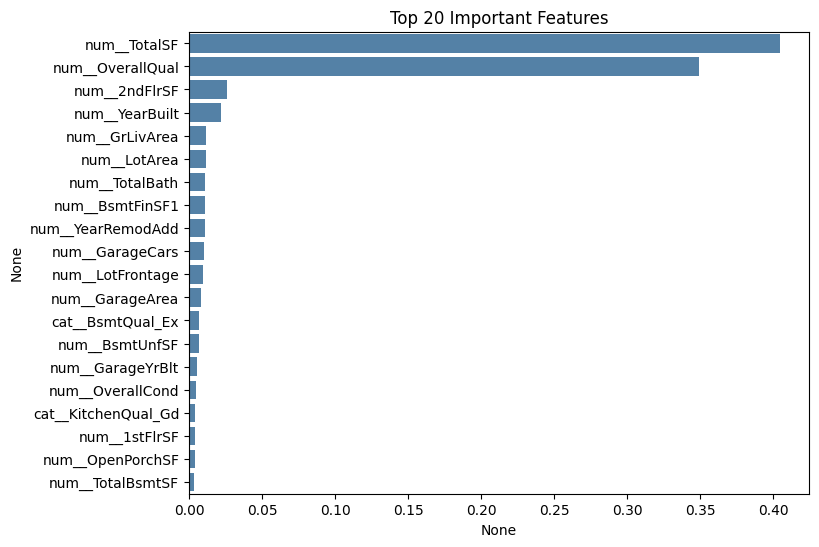

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
features = X.columns
importances = model.feature_importances_

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp, y=feat_imp.index, color="steelblue")
plt.title("Top 20 Important Features")
plt.show()

## Summary

In [8]:
def build_model(df):
    X = df.drop('SalePrice', axis=1)
    y = df['SalePrice']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
        )

    model = RandomForestRegressor(
        n_estimators=500,
        random_state=42,
        n_jobs=-1
    ).fit(X_train, y_train)

    return model

In [9]:
df = pd.read_csv(in_file_paths['train'], index_col='Id')

model = build_model(df)
model

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
def save_model(model, out_path):
    import pickle
    with open(out_path, 'wb') as outfile:
        pickle.dump(model, outfile)

save_model(model, out_file_paths['model'])